# SHARK ATTACKS IN THE UNITED STATES!

## I love to surf but one of the biggest fears people have in the water is shark attacks. The purpose of this project is to quickly analyze shark attacks in the United States!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Now lets import our dataset that we got from Kaggle!
path = "attacks.csv"

In [3]:
#Lets take a look at the first few lines of the data.
attack_df = pd.read_csv(path, encoding='latin1')
attack_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
# Lets take a look at all the columns in the dataset!
attack_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Looking at the different columns in the dataset, I can see some of the interesting columns that we can analyze. The columns I believe that are the most interest are Case Number, Date, Year, Type, Country, Area, Location, Activity, Injury, Fatal, Time, and Species. I think that we should remove all of the extra columns.

In [5]:
#Lets remove all of the columns we are not going to use and that arent very helpful to us.
drop_columns = ['Case Number', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
for x in drop_columns:
  attack_df.drop(columns=[x], inplace=True)

In [6]:
# Lets take a look at our revised dataset.
attack_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [7]:
# Since I live in the United States, lets pull out all the other countries.
new_df = attack_df.loc[attack_df['Country'] == "USA"]
new_df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N,NaN,NaN
6283,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,2-inch lacerations,N,NaN,NaN
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN
6292,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN


In [8]:
#Lets check about how many rows of data or how many shark attacks there are in the US.
len(new_df)

2229

## Just from looking at the dataframe, we can see there are some nan values. Lets check how many there are in each column and clean them up!

In [9]:
new_df.isna().sum()

Date             0
Year             0
Type             0
Country          0
Area             4
Location        51
Activity       134
Name            30
Sex             98
Age            727
Injury           5
Fatal (Y/N)    188
Time           845
Species        906
dtype: int64

In [10]:
#Lets change all the NaN in the dataset to unknown
df2 = new_df.replace(np.nan, "UNKNOWN", regex=True)
df2

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,UNKNOWN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,UNKNOWN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,UNKNOWN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,UNKNOWN,Abrasions & bruises hip to ankle,N,UNKNOWN,UNKNOWN
6283,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,UNKNOWN,2-inch lacerations,N,UNKNOWN,UNKNOWN
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,UNKNOWN,"""Lost leg""",N,UNKNOWN,UNKNOWN
6292,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,UNKNOWN,"A ""chiefess""",F,UNKNOWN,Ankle bitten,N,UNKNOWN,UNKNOWN


In [11]:
#Here since Age is supposed to be a number instead of unknown, lets change it to 0.
df2["Age"]= df2["Age"].replace('unknown', 0)
df2

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,UNKNOWN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,UNKNOWN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,UNKNOWN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,UNKNOWN,Abrasions & bruises hip to ankle,N,UNKNOWN,UNKNOWN
6283,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,UNKNOWN,2-inch lacerations,N,UNKNOWN,UNKNOWN
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,UNKNOWN,"""Lost leg""",N,UNKNOWN,UNKNOWN
6292,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,UNKNOWN,"A ""chiefess""",F,UNKNOWN,Ankle bitten,N,UNKNOWN,UNKNOWN


## Lets create a line graph to see all of the shark attacks!

Text(0.5, 1.0, 'Shark Attacks')

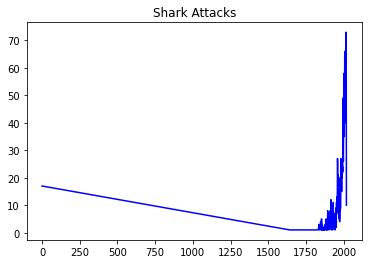

In [12]:
year = dict(df2['Year'].value_counts())
year = dict(sorted(year.items()))
year_cop= dict(year)
ax1 = plt.plot(year_cop.keys(), year_cop.values(), 'b-')
plt.title('Shark Attacks')


## This data does not look right! Lets change the dataset so it only shows the years from 1950 and above to keep the data relevant!

In [13]:
df3 = df2.loc[df2['Year'] > 1949]
df3

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,UNKNOWN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,UNKNOWN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,UNKNOWN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,25-Jun-1950,1950.0,Unprovoked,USA,New York,"Beach 103rd Street, Rockaway",Swimming,Joseph Salengo,M,16,"Gashes & lacerations on legs, foot lacerated.",N,UNKNOWN,"""sand shark"""
4473,06-Jun-1950,1950.0,Sea Disaster,USA,Florida,275 miles northeast of Miami,Survived crash of two-engine C-46 transport p...,Pedro Guzman,M,25,"FATAL, bitten five times. Other survivors foug...",Y,09h00,UNKNOWN
4483,16-Jan-1950,1950.0,Invalid,USA,Hawaii,"Kahakuloa, Maui","Fishing, one of three fishermen swept into the...",Gilbert S. Hotta,M,UNKNOWN,His remains were recovered from a huge shark...,UNKNOWN,Night,Shark involvement prior to death was not confi...
4490,1950,1950.0,Unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Standing,George Carter,M,UNKNOWN,Arm bitten,N,UNKNOWN,UNKNOWN


Text(0.5, 1.0, 'Shark Attacks after 1950')

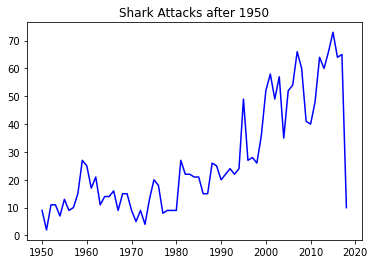

In [14]:
year = dict(df3['Year'].value_counts())
year = dict(sorted(year.items()))
year_cop= dict(year)
ax1 = plt.plot(year_cop.keys(), year_cop.values(), 'b-')
plt.title('Shark Attacks after 1950 in the United States')

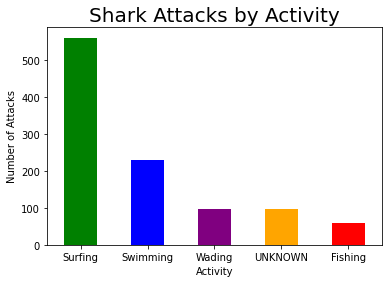

In [15]:
#Lets check what the top 5 activities have the most shark related accidents.
color = ["green", "blue", "purple", "orange", "red"]
top_activities = df3['Activity'].value_counts().head()
top_activities.plot.bar(rot=0, color=color)
plt.xlabel("Activity")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Activity", fontsize=20)
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.show()

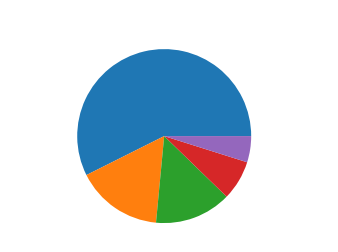

In [16]:
#Lets look at the states with the most shark attacks
top_states = df3['Area'].value_counts().head()
top_states.plot.pie(rot=0)
plt.title("States with most Shark Attacks", fontsize=20)
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.show()

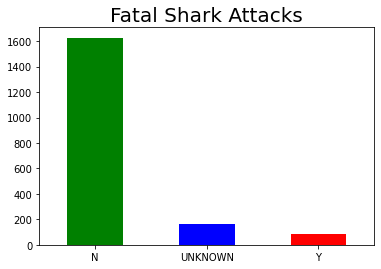

In [24]:
#Lets check the fatality rate of shark incidents
color = ["green", "blue", "red"]
fatalities = df3['Fatal (Y/N)'].value_counts()
fatalities.plot.bar(rot=0, color=color)
plt.title("Fatal Shark Attacks", fontsize=20, color="black")
plt.show()

Text(0.5, 1.0, 'Shark Species')

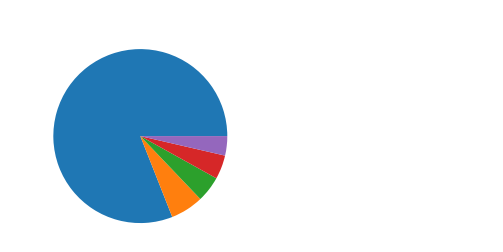

In [25]:
#Lets check what the top 5 activities have the most shark related accidents.
species = df3['Species '].value_counts().head()
species.plot.pie(x='species', rot=0)
plt.title("Shark Species", fontsize=20)

In [26]:
#I live in California, so lets take a look at how many shark attacks are there. 
df4 = df3.loc[df3['Area'] == "California"]
df4


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
54,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N,12h00,UNKNOWN
60,24-Nov-2017,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,Right leg bitten,N,13h45,"White shark, 4.6 m"
105,01-Aug-2017,2017.0,Boating,USA,California,"Between Pescadero Point & Bean Hollow Beach, S...",Kayaking / Fishing,Patrick Conroy,M,UNKNOWN,"No injury, bow of kayak bitten",N,10h45,"White shark, 10'"
116,20-Jul-2017,2017.0,Boating,USA,California,"Stearns Wharf, Santa Barbara",Kayaking,Bret Jackson,M,40,"No injury, kayak bitten",N,11h20,"White shark, 11' to 13'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,27-Jul-1952,1952.0,Sea Disaster,USA,California,"Off Santa Monica, Los Angeles County",Boat exploded,"Wes Wiggins and 7 others on the boat, Sparetime",M,UNKNOWN,FATAL & some of the survivors were bitten by s...,Y,UNKNOWN,UNKNOWN
4408,13-Jul-1952,1952.0,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,34,Part of hand removed by shark he had caught PR...,N,UNKNOWN,UNKNOWN
4410,27-May-1952,1952.0,Unprovoked,USA,California,"Imperial Beach, San Diego County",Swimming on surface,"Arthur E. Taylor, a navy diver & member+G1053 ...",M,UNKNOWN,Foot & swimfin bitten,N,10h00 or 14h00,"White shark, 2 m to 4 m [6'9"" to 13']"
4440,Reported 19-Jul-1951,1951.0,Unprovoked,USA,California,"Long Beach, Los Angeles County",UNKNOWN,Archie Nottingham,M,13,Severe laceration to foot,N,UNKNOWN,UNKNOWN


Wow it looks like there were about 290 attacks in California from this dataset.

In [27]:
top_attacks_in_california = df4['Location'].value_counts().head()
top_attacks_in_california

La Jolla, San Diego County          5
Huntington Beach, Orange County     5
Venice Beach, Los Angeles County    4
Dillon Beach, Marin County          4
Moonstone Beach, Humboldt County    4
Name: Location, dtype: int64

Text(0.5, 1.0, 'Shark Attacks after 1950 in California')

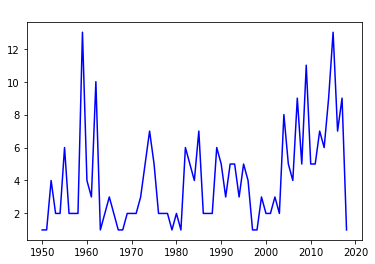

In [28]:
year = dict(df4['Year'].value_counts())
year = dict(sorted(year.items()))
year_cop= dict(year)
ax1 = plt.plot(year_cop.keys(), year_cop.values(), 'b-')
plt.title('Shark Attacks after 1950 in California')